In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns

In [19]:
df= pd.read_csv(r'C:\Users\divya\OneDrive\Documents\SEM4\DAB400\Group 7\daily-website-visitors.csv', parse_dates=True, index_col =0)
pd.options.display.float_format = '{:,.2f}'.format

C:\Users\divya\AppData\Local\Temp\ipykernel_24880\4106285041.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df= pd.read_csv(r'C:\Users\divya\OneDrive\Documents\SEM4\DAB400\Group 7\daily-website-visitors.csv', parse_dates=True, index_col =0)


In [20]:
# Renaming columns by removing dots
df.columns = df.columns.str.replace('.', ' ')

# Display the renamed columns to confirm changes
df.head()

,Day,Day Of Week,Date,Page Loads,Unique Visits,First Time Visits,Returning Visits
Row,,,,,,,
1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [21]:
# Removing , from columns and changing it to numeric.
df['Unique Visits'] = df['Unique Visits'].str.replace(",","")
df['Unique Visits'] = pd.to_numeric(df['Unique Visits'])
df1 = df[['Date','Unique Visits']]
df1 = df1.set_index('Date')
df1.head()

,Unique Visits
Date,
9/14/2014,1582
9/15/2014,2528
9/16/2014,2630
9/17/2014,2614
9/18/2014,2366


In [24]:
df1['Unique Visits'] = df1['Unique Visits']

# calculate moving averages without attempting to reconvert data types
df1['Unique Visits_MA5'] = df1['Unique Visits'].rolling(window=5).mean()
df1['Unique Visits_MA10'] = df1['Unique Visits'].rolling(window=10).mean()

# Display the data to confirm the addition of the moving averages, focusing on the initial rows where the moving averages start to appear
df1[['Unique Visits', 'Unique Visits_MA5', 'Unique Visits_MA10']].tail(15)


,Unique Visits,Unique Visits_MA5,Unique Visits_MA10
Date,,,
8/5/2020,2774,"2,435.20","2,619.00"
8/6/2020,2625,"2,610.20","2,578.40"
8/7/2020,2364,"2,684.40","2,517.90"
8/8/2020,1628,"2,447.20","2,379.70"
8/9/2020,1941,"2,266.40","2,305.10"
8/10/2020,2745,"2,260.60","2,347.90"
8/11/2020,2742,"2,284.00","2,447.10"
8/12/2020,2904,"2,392.00","2,538.20"
8/13/2020,2780,"2,622.40","2,534.80"


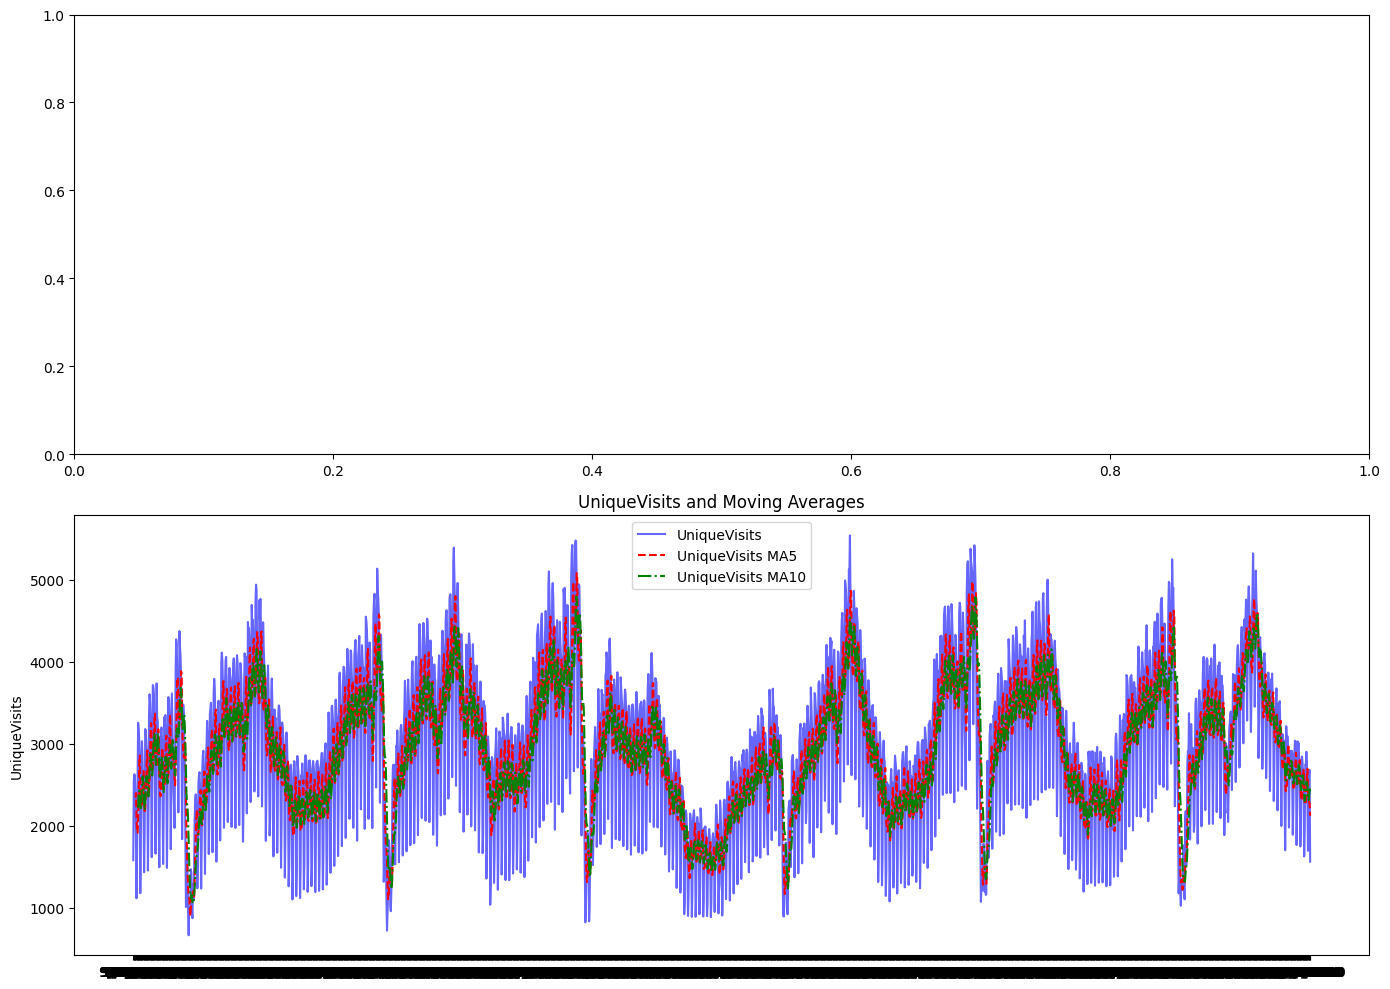

In [26]:
import matplotlib.pyplot as plt

# Plotting UniqueVisits along with their moving averages

fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# UniqueVisits and its moving averages
ax[1].plot( df1['Unique Visits'], label='UniqueVisits', color='blue', alpha=0.6)
ax[1].plot( df1['Unique Visits_MA5'], label='UniqueVisits MA5', color='red', linestyle='--')
ax[1].plot( df1['Unique Visits_MA10'], label='UniqueVisits MA10', color='green', linestyle='-.')
ax[1].set_title('UniqueVisits and Moving Averages')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('UniqueVisits')
ax[1].legend()

plt.tight_layout()
plt.show()


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define a function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate errors for UniqueVisits
mae_uniquevisits_5 = mean_absolute_error(df1['Unique Visits'][4:], df1['Unique Visits_MA5'][4:])
mse_uniquevisits_5 = mean_squared_error(df1['Unique Visits'][4:], df1['Unique Visits_MA5'][4:])
rmse_uniquevisits_5 = rmse(df1['Unique Visits'][4:], df1['Unique Visits_MA5'][4:])

mae_uniquevisits_10 = mean_absolute_error(df1['Unique Visits'][9:], df1['Unique Visits_MA10'][9:])
mse_uniquevisits_10 = mean_squared_error(df1['Unique Visits'][9:], df1['Unique Visits_MA10'][9:])
rmse_uniquevisits_10 = rmse(df1['Unique Visits'][9:], df1['Unique Visits_MA10'][9:])

{
    "UniqueVisits_5_day": {"MAE": mae_uniquevisits_5, "MSE": mse_uniquevisits_5, "RMSE": rmse_uniquevisits_5},
    "UniqueVisits_10_day": {"MAE": mae_uniquevisits_10, "MSE": mse_uniquevisits_10, "RMSE": rmse_uniquevisits_10}
}


{'UniqueVisits_5_day': {'MAE': 649.7037447988905,
  'MSE': 561242.381507166,
  'RMSE': 749.1611185233561},
 'UniqueVisits_10_day': {'MAE': 556.5500463392029,
  'MSE': 429647.4636793327,
  'RMSE': 655.4749908877781}}